In [19]:
import wave
import os
import librosa 
import librosa.display

In [3]:
Path_to_train = "C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav"
subfolders = os.listdir(Path_to_train)
data = []
for s in subfolders:
    files = os.listdir(Path_to_train + "/" +s)
    data.extend([Path_to_train + "/" + s+ "/" + f for f in files])
data[:10]

['C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104.wav',
 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SW

In [6]:
#read text from every transcription audio
def read_text( text_path):
    text = []
    with open(text_path) as fp:
        line = fp.readline()
        while line:
        # TODO: fix spaces in in amharic text
            text.append(line)
            line = fp.readline()
    return text

In [7]:
#extract the transcription and the label 
label=[]
transcriptions = []
for t in text:
    sp = t.split("\t")
    sp = sp.strip("\n")
    if len(sp) > 1:
        label.append(sp[0])
        transcriptions.append(sp[1])
transcriptions[:10]

NameError: name 'text' is not defined

In [8]:
#get audio path , every path must corespond to transcription , get the transprion in the doc and append to audio path 
audio_path=[0]*len(transcriptions)
for d in data:
    _d = d.strip(".wav")
    sp = _d.split("/")[2]
    index = label.index(sp)
    audio_path[index] = d

ValueError: 'DESMOND' is not in list

In [9]:
#calculate duration 
duration_of_recordings=[]
for d in audio_path:
    audio, fs = librosa.load(d, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))

In [10]:
import pandas as pd 
data=pd.DataFrame({'key': audio_path,'text': transcriptions, 'duration':duration_of_recordings})

In [11]:
data

,key,text,duration


### Explore the data

In [13]:
### audio clasisfication using machine learning


In [14]:
! pip install librosa

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
filename = 'C:/Users/DESMOND/NLP/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav'

In [17]:
import IPython.display as ipd

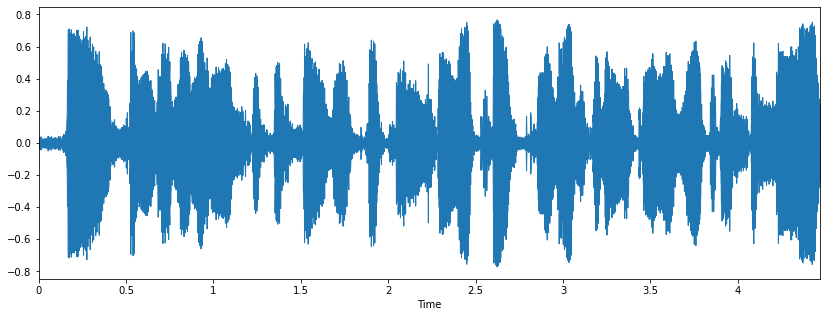

In [22]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data)
ipd.Audio(filename)

In [23]:
sample_rate

22050

In [24]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [25]:
wave_sample_rate

16000

In [26]:

wave_audio

array([  315,   532,   637, ..., -7347, -6746, -6394], dtype=int16)

In [27]:
data

array([ 0.00949342,  0.01522155,  0.01770687, ..., -0.21883075,
       -0.20150991,  0.        ], dtype=float32)